---

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/lotte.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247370 entries, 0 to 247369
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   자전거번호     247370 non-null  object 
 1   대여일시      247370 non-null  object 
 2   대여 대여소번호  247370 non-null  int64  
 3   대여 대여소명   247370 non-null  object 
 4   대여거치대     247370 non-null  int64  
 5   반납일시      247370 non-null  object 
 6   반납대여소번호   247370 non-null  float64
 7   반납대여소명    247370 non-null  object 
 8   반납거치대     247370 non-null  int64  
 9   이용시간(분)   247370 non-null  int64  
 10  이용거리(M)   247370 non-null  float64
 11  이용자종류     247370 non-null  object 
 12  대여대여소ID   247370 non-null  object 
 13  반납대여소ID   247370 non-null  object 
 14  자치구       247370 non-null  object 
 15  반납 자치구    247370 non-null  object 
 16  날짜        247370 non-null  object 
 17  연도        247370 non-null  int64  
 18  월         247370 non-null  int64  
 19  일         247370 non-null  int64  
 20  요일  

In [4]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
0,SPB-69309,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,...,ST-891,ST-1866,송파구,송파구,2024-04-01,2024,4,1,0,0
1,SPB-37133,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-2409,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
2,SPB-66954,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
3,SPB-37133,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
4,SPB-66954,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0


In [5]:
# 대여일시, 반납일시 datetime type으로 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [6]:
# 대여소명이 롯데월드타워인 데이터와 반납 대여소명이 롯데월드타워인 데이터 추출

rent_data = df[df['대여 대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
return_data = df[df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']

In [7]:
rent_data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
0,SPB-69309,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,...,ST-891,ST-1866,송파구,송파구,2024-04-01,2024,4,1,0,0
3,SPB-37133,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
4,SPB-66954,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
12,SPB-68175,2024-04-01 06:21:13,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 06:23:39,2608.0,송파구청,0,2,...,ST-891,ST-1681,송파구,송파구,2024-04-01,2024,4,1,0,0
13,SPB-65003,2024-04-01 06:28:59,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 06:29:06,1210.0,롯데월드타워(잠실역2번출구 쪽),0,0,...,ST-891,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0


In [8]:
return_data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
1,SPB-37133,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-2409,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
2,SPB-66954,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
5,SPB-68175,2024-04-01 05:02:07,1248,방이초등학교,0,2024-04-01 05:15:32,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-908,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
6,SPB-59206,2024-04-01 05:09:12,2641,송파역 4번출구,0,2024-04-01 05:21:07,1210.0,롯데월드타워(잠실역2번출구 쪽),0,11,...,ST-1793,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
7,SPB-47005,2024-04-01 04:18:38,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 05:36:38,1210.0,롯데월드타워(잠실역2번출구 쪽),0,78,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0


In [9]:
# 대여소명 기준으로 대여대수 집계
rent_count = rent_data.groupby(['대여 대여소명', rent_data['대여일시'].dt.date.rename('날짜'), rent_data['대여일시'].dt.hour.rename('시간대')]).size().reset_index(name='대여대수')

# 반납소명 기준으로 반납대수 집계
return_count = return_data.groupby(['반납대여소명', return_data['반납일시'].dt.date.rename('날짜'), return_data['반납일시'].dt.hour.rename('시간대')]).size().reset_index(name='반납대수')

In [10]:
# 대여대수와 반납대수를 날짜와 시간대를 기준으로 병합
merged_data = pd.merge(
    rent_count.rename(columns={'대여 대여소명': '대여소'}),
    return_count.rename(columns={'반납대여소명': '대여소'}),
    on=['대여소', '날짜', '시간대'],
    how='outer'
).fillna(0)  # NaN 값은 0으로 대체

# 병합된 데이터 확인
print(merged_data.head())

                 대여소          날짜  시간대  대여대수  반납대수
0  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    0   1.0   1.0
1  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    1   1.0   0.0
2  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    4   1.0   0.0
3  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    6   0.0   3.0
4  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    7   4.0   7.0


In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8377 non-null   object 
 1   날짜      8377 non-null   object 
 2   시간대     8377 non-null   int32  
 3   대여대수    8377 non-null   float64
 4   반납대수    8377 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 294.6+ KB


In [12]:
# 날짜 column을 datetime으로 변환
merged_data['날짜'] = pd.to_datetime(merged_data['날짜'])

# 연, 월, 일. 휴일여부 컬럼 추가
merged_data['연'] = merged_data['날짜'].dt.year
merged_data['월'] = merged_data['날짜'].dt.month
merged_data['일'] = merged_data['날짜'].dt.day
merged_data['휴일여부'] = merged_data['날짜'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일
...,...,...,...,...,...,...,...,...,...
8372,롯데월드타워(잠실역2번출구 쪽),2024-05-31,19,29.0,27.0,2024,5,31,평일
8373,롯데월드타워(잠실역2번출구 쪽),2024-05-31,20,27.0,25.0,2024,5,31,평일
8374,롯데월드타워(잠실역2번출구 쪽),2024-05-31,21,19.0,18.0,2024,5,31,평일
8375,롯데월드타워(잠실역2번출구 쪽),2024-05-31,22,8.0,10.0,2024,5,31,평일


In [13]:
# 계절 함수 
def get_seasons(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'

# 계절 컬럼 추가
merged_data['계절'] = merged_data['월'].apply(get_seasons)

# 데이터 확인
merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일,봄
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일,봄
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일,봄
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일,봄
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일,봄
...,...,...,...,...,...,...,...,...,...,...
8372,롯데월드타워(잠실역2번출구 쪽),2024-05-31,19,29.0,27.0,2024,5,31,평일,봄
8373,롯데월드타워(잠실역2번출구 쪽),2024-05-31,20,27.0,25.0,2024,5,31,평일,봄
8374,롯데월드타워(잠실역2번출구 쪽),2024-05-31,21,19.0,18.0,2024,5,31,평일,봄
8375,롯데월드타워(잠실역2번출구 쪽),2024-05-31,22,8.0,10.0,2024,5,31,평일,봄


In [14]:
merged_data.isnull().sum()

대여소     0
날짜      0
시간대     0
대여대수    0
반납대수    0
연       0
월       0
일       0
휴일여부    0
계절      0
dtype: int64

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8377 non-null   object        
 1   날짜      8377 non-null   datetime64[ns]
 2   시간대     8377 non-null   int32         
 3   대여대수    8377 non-null   float64       
 4   반납대수    8377 non-null   float64       
 5   연       8377 non-null   int32         
 6   월       8377 non-null   int32         
 7   일       8377 non-null   int32         
 8   휴일여부    8377 non-null   object        
 9   계절      8377 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(4), object(3)
memory usage: 523.7+ KB


In [16]:
# 요일 컬럼 추가
merged_data['요일'] = merged_data['날짜'].dt.day_name(locale='ko_KR')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8377 non-null   object        
 1   날짜      8377 non-null   datetime64[ns]
 2   시간대     8377 non-null   int32         
 3   대여대수    8377 non-null   float64       
 4   반납대수    8377 non-null   float64       
 5   연       8377 non-null   int32         
 6   월       8377 non-null   int32         
 7   일       8377 non-null   int32         
 8   휴일여부    8377 non-null   object        
 9   계절      8377 non-null   object        
 10  요일      8377 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 589.1+ KB


In [17]:
merged_data.to_csv("../data/lotte12.csv", index=False)
df = pd.read_csv("../data/lotte12.csv")
df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일,봄,월요일
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일,봄,월요일
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일,봄,월요일
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일,봄,월요일
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일,봄,월요일


---

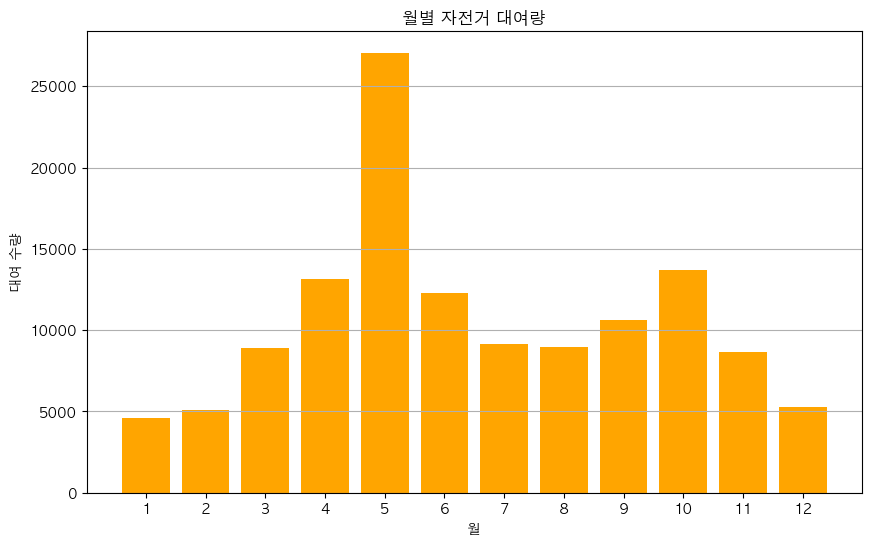

In [18]:
monthly_rentals = df.groupby('월')['대여대수'].sum()
plt.figure(figsize=(10, 6))
plt.bar(monthly_rentals.index, monthly_rentals.values, color='orange')
plt.title('월별 자전거 대여량')
plt.xlabel('월')
plt.ylabel('대여 수량')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

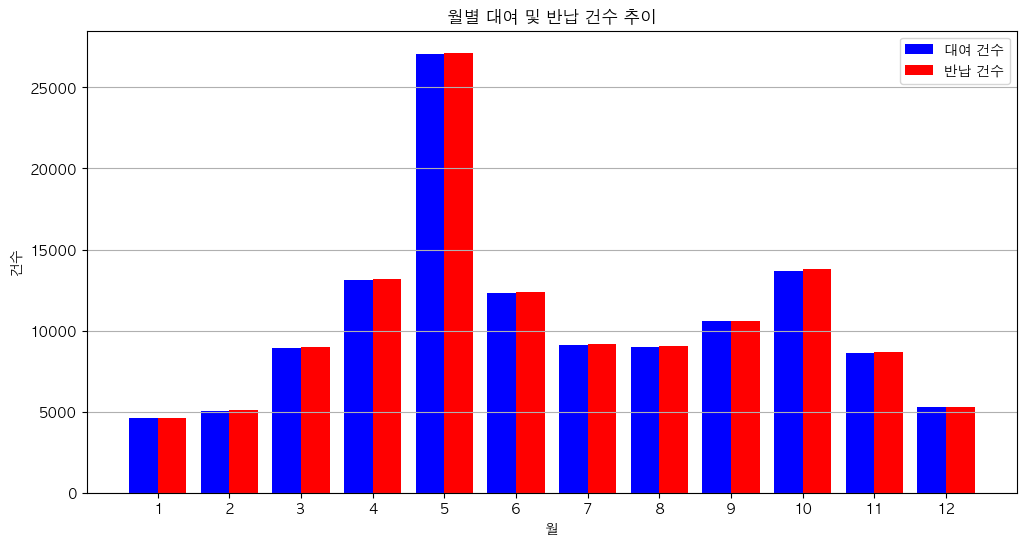

In [19]:
# 월별 대여 및 반납 건수 집계
monthly_rentals = df.groupby('월')['대여대수'].sum().reset_index()
monthly_returns = df.groupby('월')['반납대수'].sum().reset_index()

# 월별 대여 및 반납 건수 시각화 (바 그래프)
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = monthly_rentals['월']

plt.bar(index - bar_width/2, monthly_rentals['대여대수'], bar_width, label='대여 건수', color='blue')
plt.bar(index + bar_width/2, monthly_returns['반납대수'], bar_width, label='반납 건수', color='red')
plt.title('월별 대여 및 반납 건수 추이')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y')
plt.show()

> 5월달의 대여건수가 압도적으로 많다                        

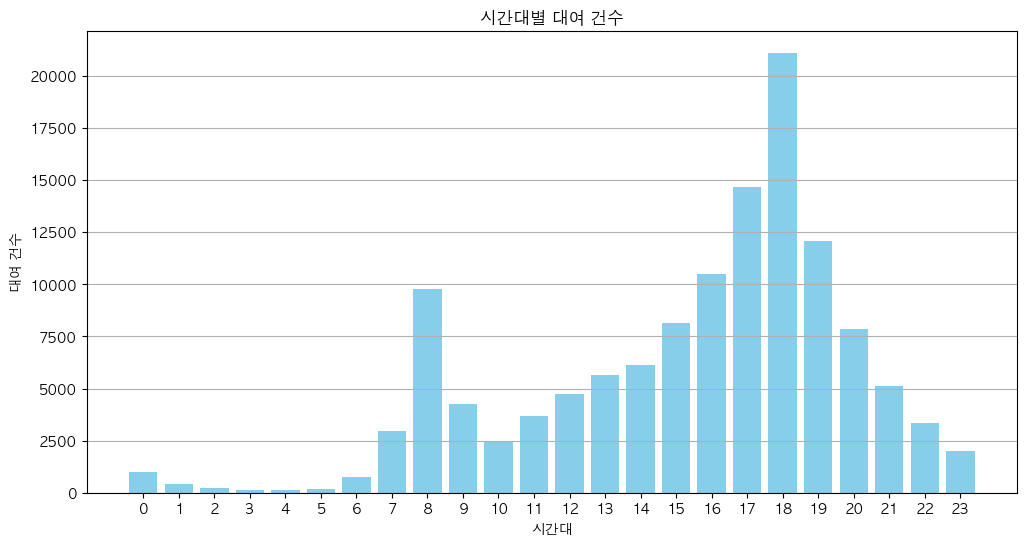

In [20]:
# 시간대별 대여 건수 집계
hourly_rentals = df.groupby('시간대')['대여대수'].sum().reset_index()

# 시간대별 대여 건수 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_rentals['시간대'], hourly_rentals['대여대수'], color='skyblue')
plt.title('시간대별 대여 건수')
plt.xlabel('시간대')
plt.ylabel('대여 건수')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

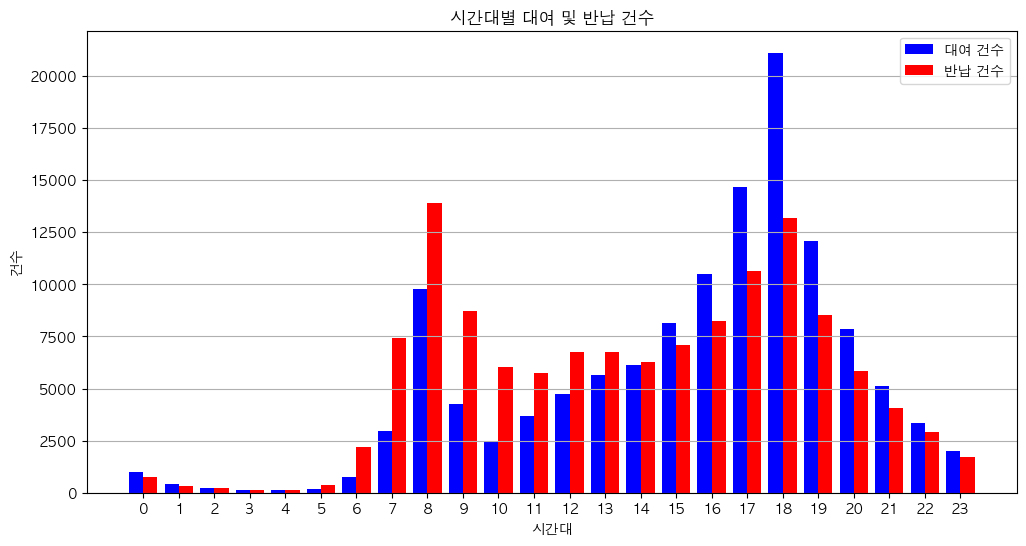

In [21]:
# 시간대별 대여 및 반납 건수 집계
hourly_rentals = df.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns = df.groupby('시간대')['반납대수'].sum().reset_index()

# 두 데이터프레임을 병합
daily_data = hourly_rentals.merge(hourly_returns, on='시간대', suffixes=('_대여', '_반납'))

# 시간대별 대여 및 반납 수량 시각화
plt.figure(figsize=(12, 6))
plt.bar(daily_data['시간대'] - 0.2, daily_data['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(daily_data['시간대'] + 0.2, daily_data['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('시간대별 대여 및 반납 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.show()

> 출퇴근 시간: 아침과 저녁 출퇴근 시간대에 대여가 집중되어 있다.

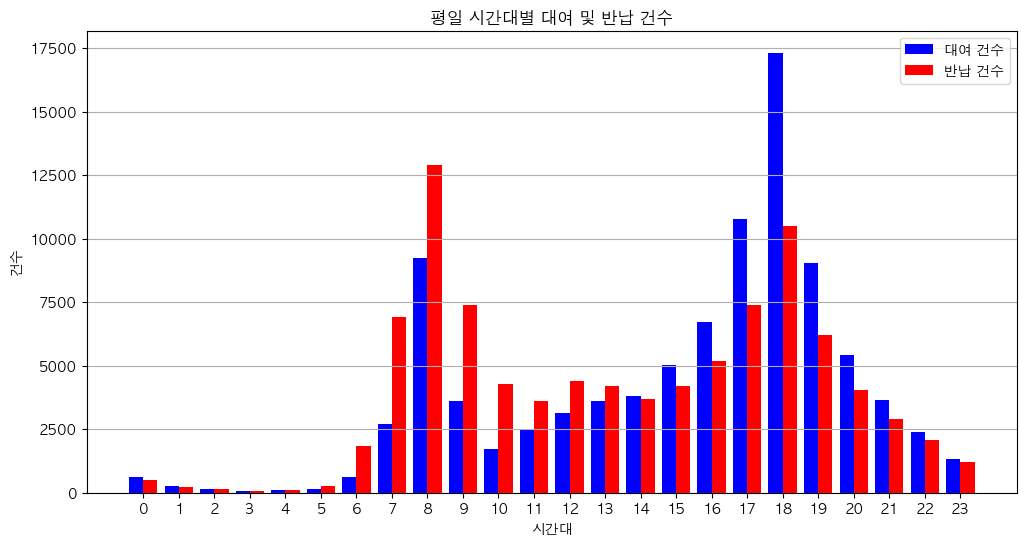

Text(0.5, 1.0, '주말 시간대별 대여 및 반납 건수')

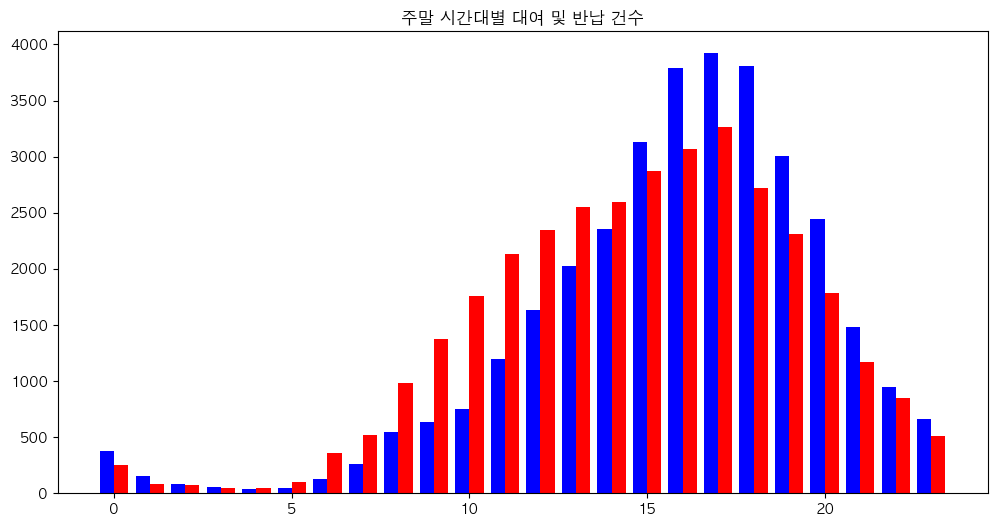

In [22]:
# 주말 이용 시간대 및 평일 이용시간대 분리
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 요일 컬럼 추가
df['요일'] = df['날짜'].dt.dayofweek  # 0=월요일, 6=일요일

# 평일(0-4)과 주말(5-6) 데이터 분리
weekdays_data = df[df['요일'] < 5]  # Monday to Friday
weekends_data = df[df['요일'] >= 5]  # Saturday, Sunday

# 시간대별 대여 및 반납 건수 집계
hourly_rentals_weekdays = weekdays_data.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns_weekdays = weekdays_data.groupby('시간대')['반납대수'].sum().reset_index()

hourly_rentals_weekends = weekends_data.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns_weekends = weekends_data.groupby('시간대')['반납대수'].sum().reset_index()

# 두 데이터프레임을 병합
weekdays_data_merged = hourly_rentals_weekdays.merge(hourly_returns_weekdays, on='시간대', suffixes=('_대여', '_반납'))
weekends_data_merged = hourly_rentals_weekends.merge(hourly_returns_weekends, on='시간대', suffixes=('_대여', '_반납'))

# 평일 데이터 시각화
plt.figure(figsize=(12, 6))
plt.bar(weekdays_data_merged['시간대'] - 0.2, weekdays_data_merged['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(weekdays_data_merged['시간대'] + 0.2, weekdays_data_merged['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('평일 시간대별 대여 및 반납 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.show()

# 주말 데이터 시각화
plt.figure(figsize=(12, 6))
plt.bar(weekends_data_merged['시간대'] - 0.2, weekends_data_merged['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(weekends_data_merged['시간대'] + 0.2, weekends_data_merged['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('주말 시간대별 대여 및 반납 건수')


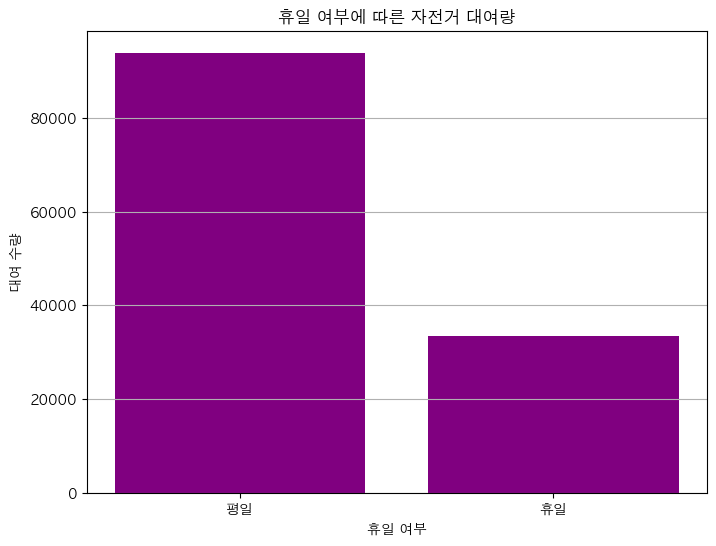

In [23]:
holiday_rentals = df.groupby('휴일여부')['대여대수'].sum()
plt.figure(figsize=(8, 6))
plt.bar(holiday_rentals.index, holiday_rentals.values, color='purple')
plt.title('휴일 여부에 따른 자전거 대여량')
plt.xlabel('휴일 여부')
plt.ylabel('대여 수량')
plt.grid(axis='y')
plt.show()

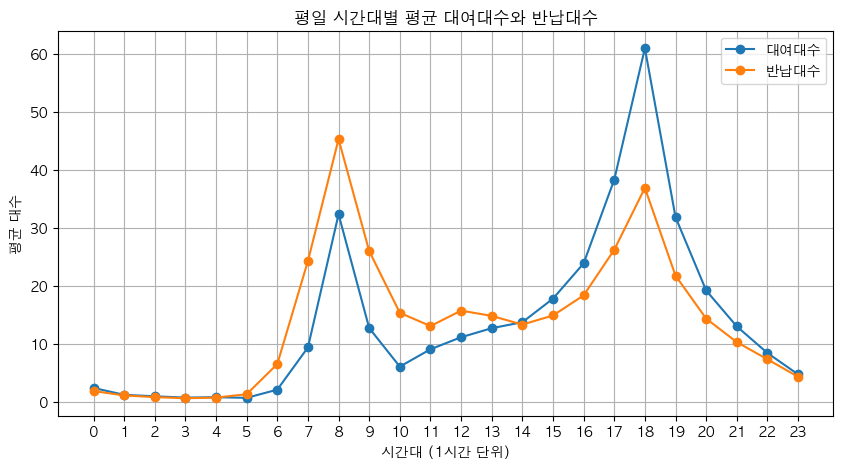

In [24]:
# '휴일여부'가 평일인 데이터만 필터링
holiday_data = df[df['휴일여부'] == '평일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('평일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

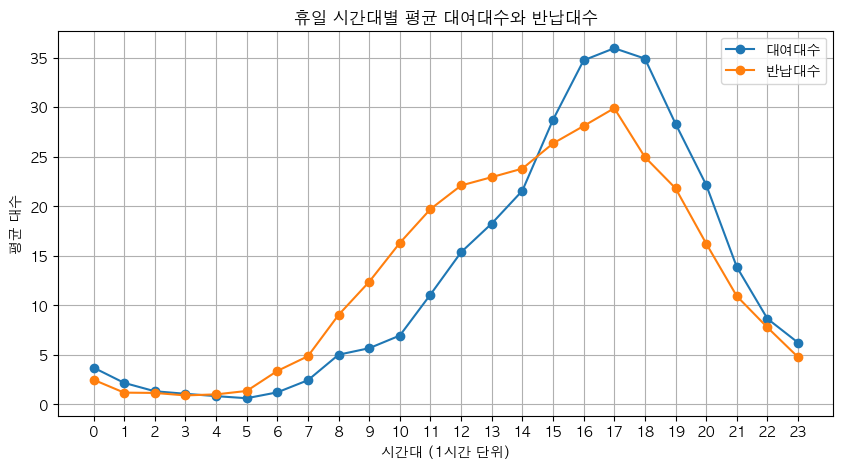

In [25]:
# '휴일여부'가 휴일인 데이터만 필터링
holiday_data = df[df['휴일여부'] == '휴일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('휴일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 평일과 휴일중 평일이 앞도적으로 이용량이 높다. 

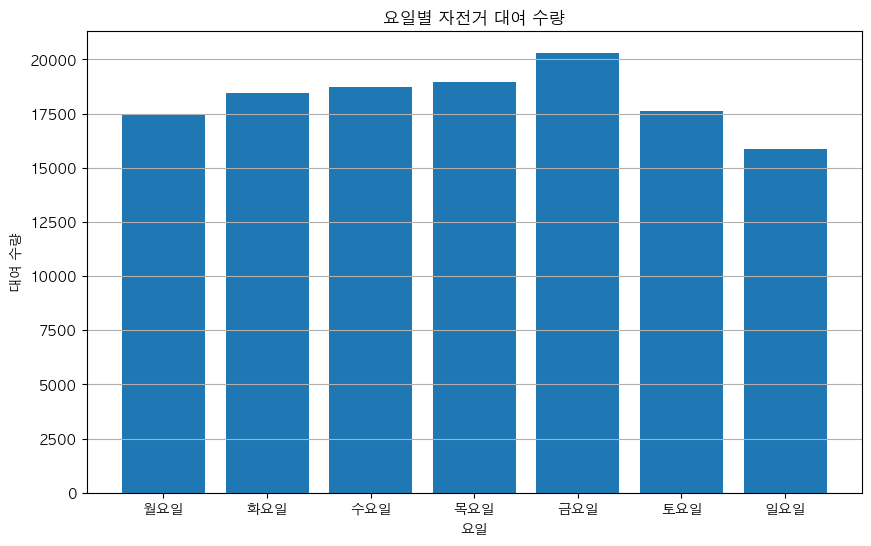

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일 매핑
day_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
df['요일'] = df['날짜'].dt.dayofweek.map(day_mapping)

# 요일별 대여 수량 집계
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
weekday_rentals = df.groupby('요일')['대여대수'].sum().reindex(weekday_order, fill_value=0)

# 요일별 대여 수량 시각화
plt.figure(figsize=(10, 6))
plt.bar(weekday_rentals.index, weekday_rentals.values)
plt.title('요일별 자전거 대여 수량')
plt.xlabel('요일')
plt.ylabel('대여 수량')
plt.grid(axis='y')
plt.show()

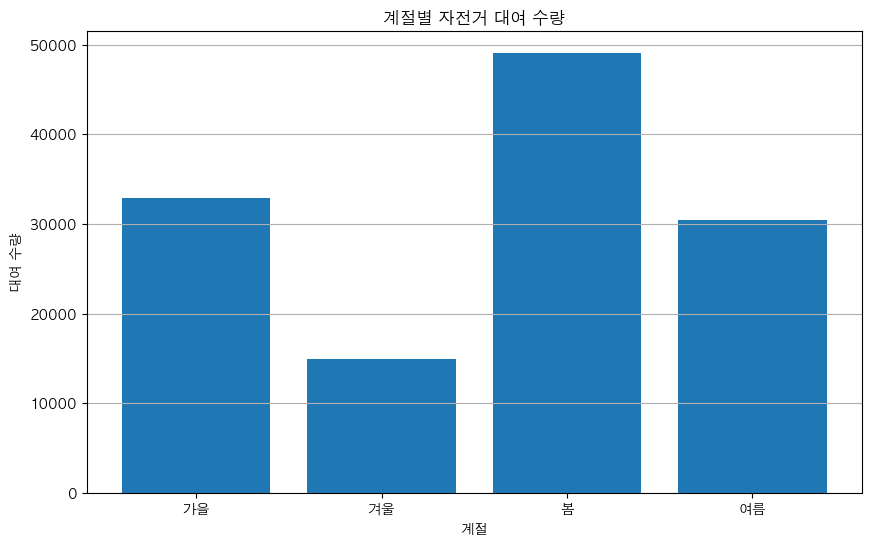

In [27]:
# 계절별 대여 수량 시각화
season_rentals = df.groupby('계절')['대여대수'].sum()
plt.figure(figsize=(10, 6))
plt.bar(season_rentals.index, season_rentals.values)
plt.title('계절별 자전거 대여 수량')
plt.xlabel('계절')
plt.ylabel('대여 수량')
plt.grid(axis='y')
plt.show()

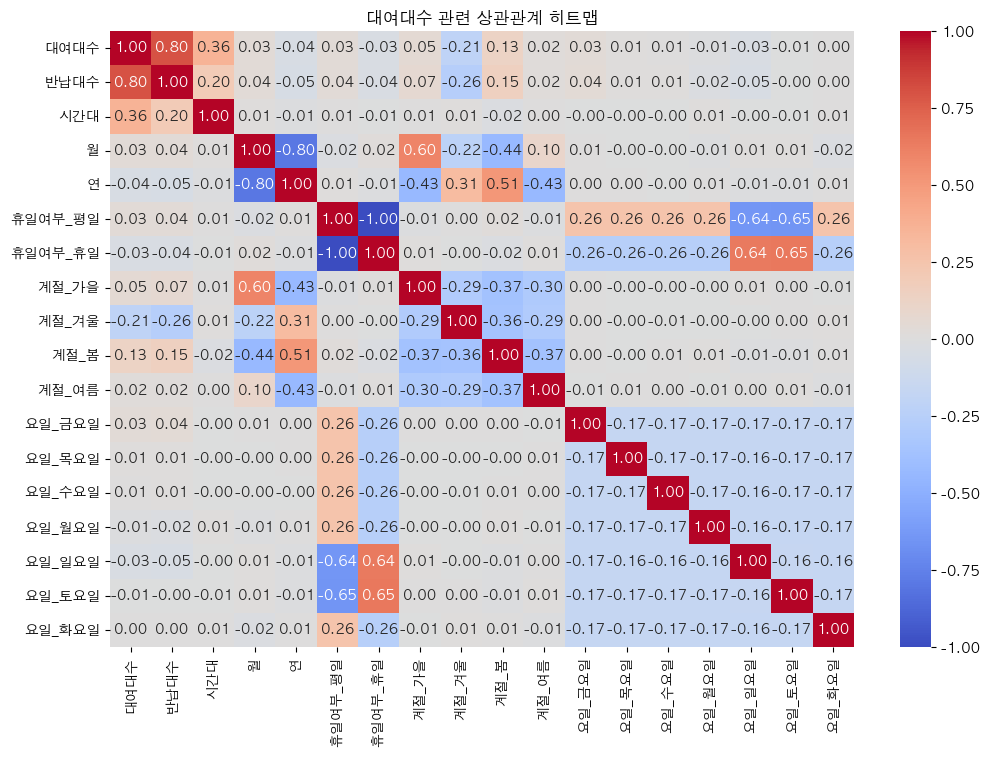

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수들을 더미 변수로 변환
df_encoded = pd.get_dummies(df, columns=['휴일여부', '계절', '요일'])

# 대여대수와 관련된 특징들만 선택
correlation_data = df_encoded[['대여대수', '반납대수', '시간대', '월', '연'] + 
                            [col for col in df_encoded.columns if '휴일여부_' in col or '계절_' in col or '요일_' in col]]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('대여대수 관련 상관관계 히트맵')
plt.show()

> 만약 따릉이를 출퇴근 용도로만 사용한다고 할 시는 월별로 균등할텐데 5월에만 건수 추이가 굉장히 높은 것으로 획인되는 것을 보니 석촌호수의 자전거도로 이용이 많을 듯 하여 좀더 확인해보기 위해 날씨데이터 추가

In [29]:
df_w = pd.read_csv("../data/송파구날씨통합.csv")
df_w.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간,PM10,PM25
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0,67.0,30.0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1,66.0,26.0
2,108,서울,2023-05-01 02:00:00,11.0,0.0,90,6,778,2023-05-01,2,64.0,28.0
3,108,서울,2023-05-01 03:00:00,10.8,0.0,91,8,672,2023-05-01,3,58.0,22.0
4,108,서울,2023-05-01 04:00:00,10.4,0.0,92,8,633,2023-05-01,4,56.0,22.0


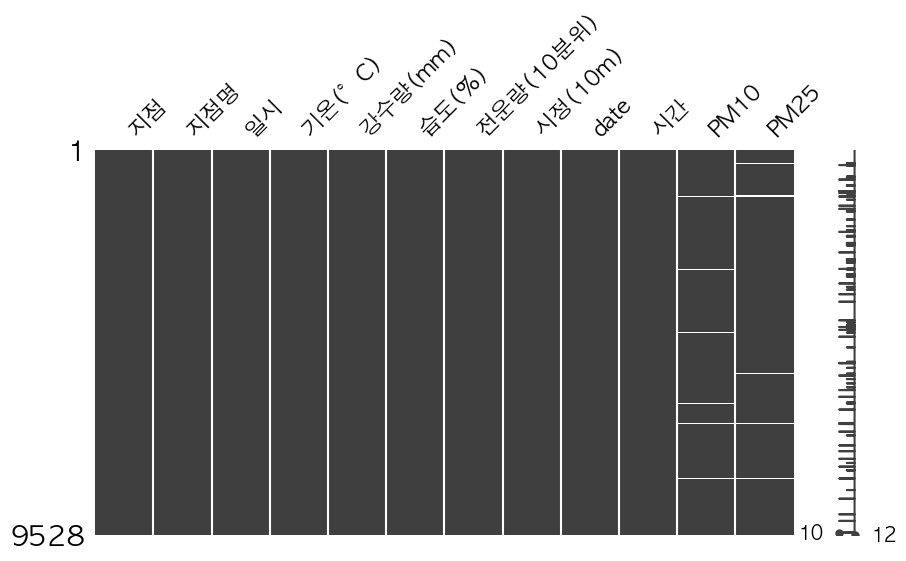

In [30]:
# 결측치 시각화
import missingno as msno
msno.matrix(df_w, figsize=(10,5))
plt.show()

#### 미세먼지 농도 관련된 데이에 NaN값 확인됨
> 시간대별 평균으로 대치

In [31]:
# 시간대별 평균 계산
avg_pm = df_w.groupby('시간')[['PM10', 'PM25']].mean().reset_index()
avg_pm.columns = ['시간', 'avg_PM10', 'avg_PM25']

# NaN 값 채우기
for index, row in df_w.iterrows():
    if pd.isna(row['PM10']):
        df_w.at[index, 'PM10'] = avg_pm[avg_pm['시간'] == row['시간']]['avg_PM10'].values[0]
    if pd.isna(row['PM25']):
        df_w.at[index, 'PM25'] = avg_pm[avg_pm['시간'] == row['시간']]['avg_PM25'].values[0]

# NaN 값이 남아있는지 확인
df_w[['PM10', 'PM25']].isnull().sum()

PM10    0
PM25    0
dtype: int64

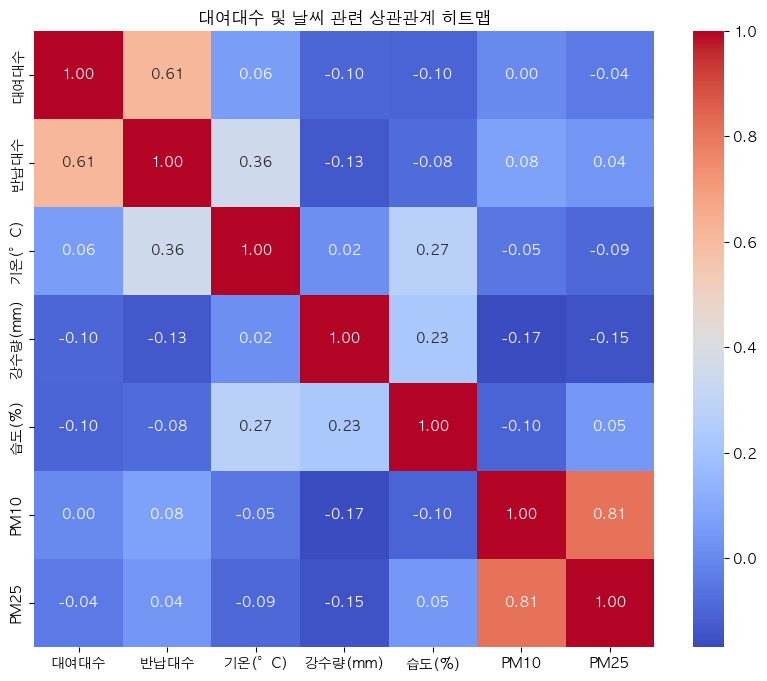

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜와 시간대를 기준으로 데이터 병합
df['날짜'] = pd.to_datetime(df['날짜'])
df_w['일시'] = pd.to_datetime(df_w['일시'])
merged_df = pd.merge(df, df_w, left_on=['날짜', '시간대'], right_on=['일시', '시간'], how='inner')

# 필요한 열 선택
correlation_data = merged_df[['대여대수', '반납대수', '기온(°C)', '강수량(mm)', '습도(%)', 'PM10', 'PM25']]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('대여대수 및 날씨 관련 상관관계 히트맵')
plt.show()

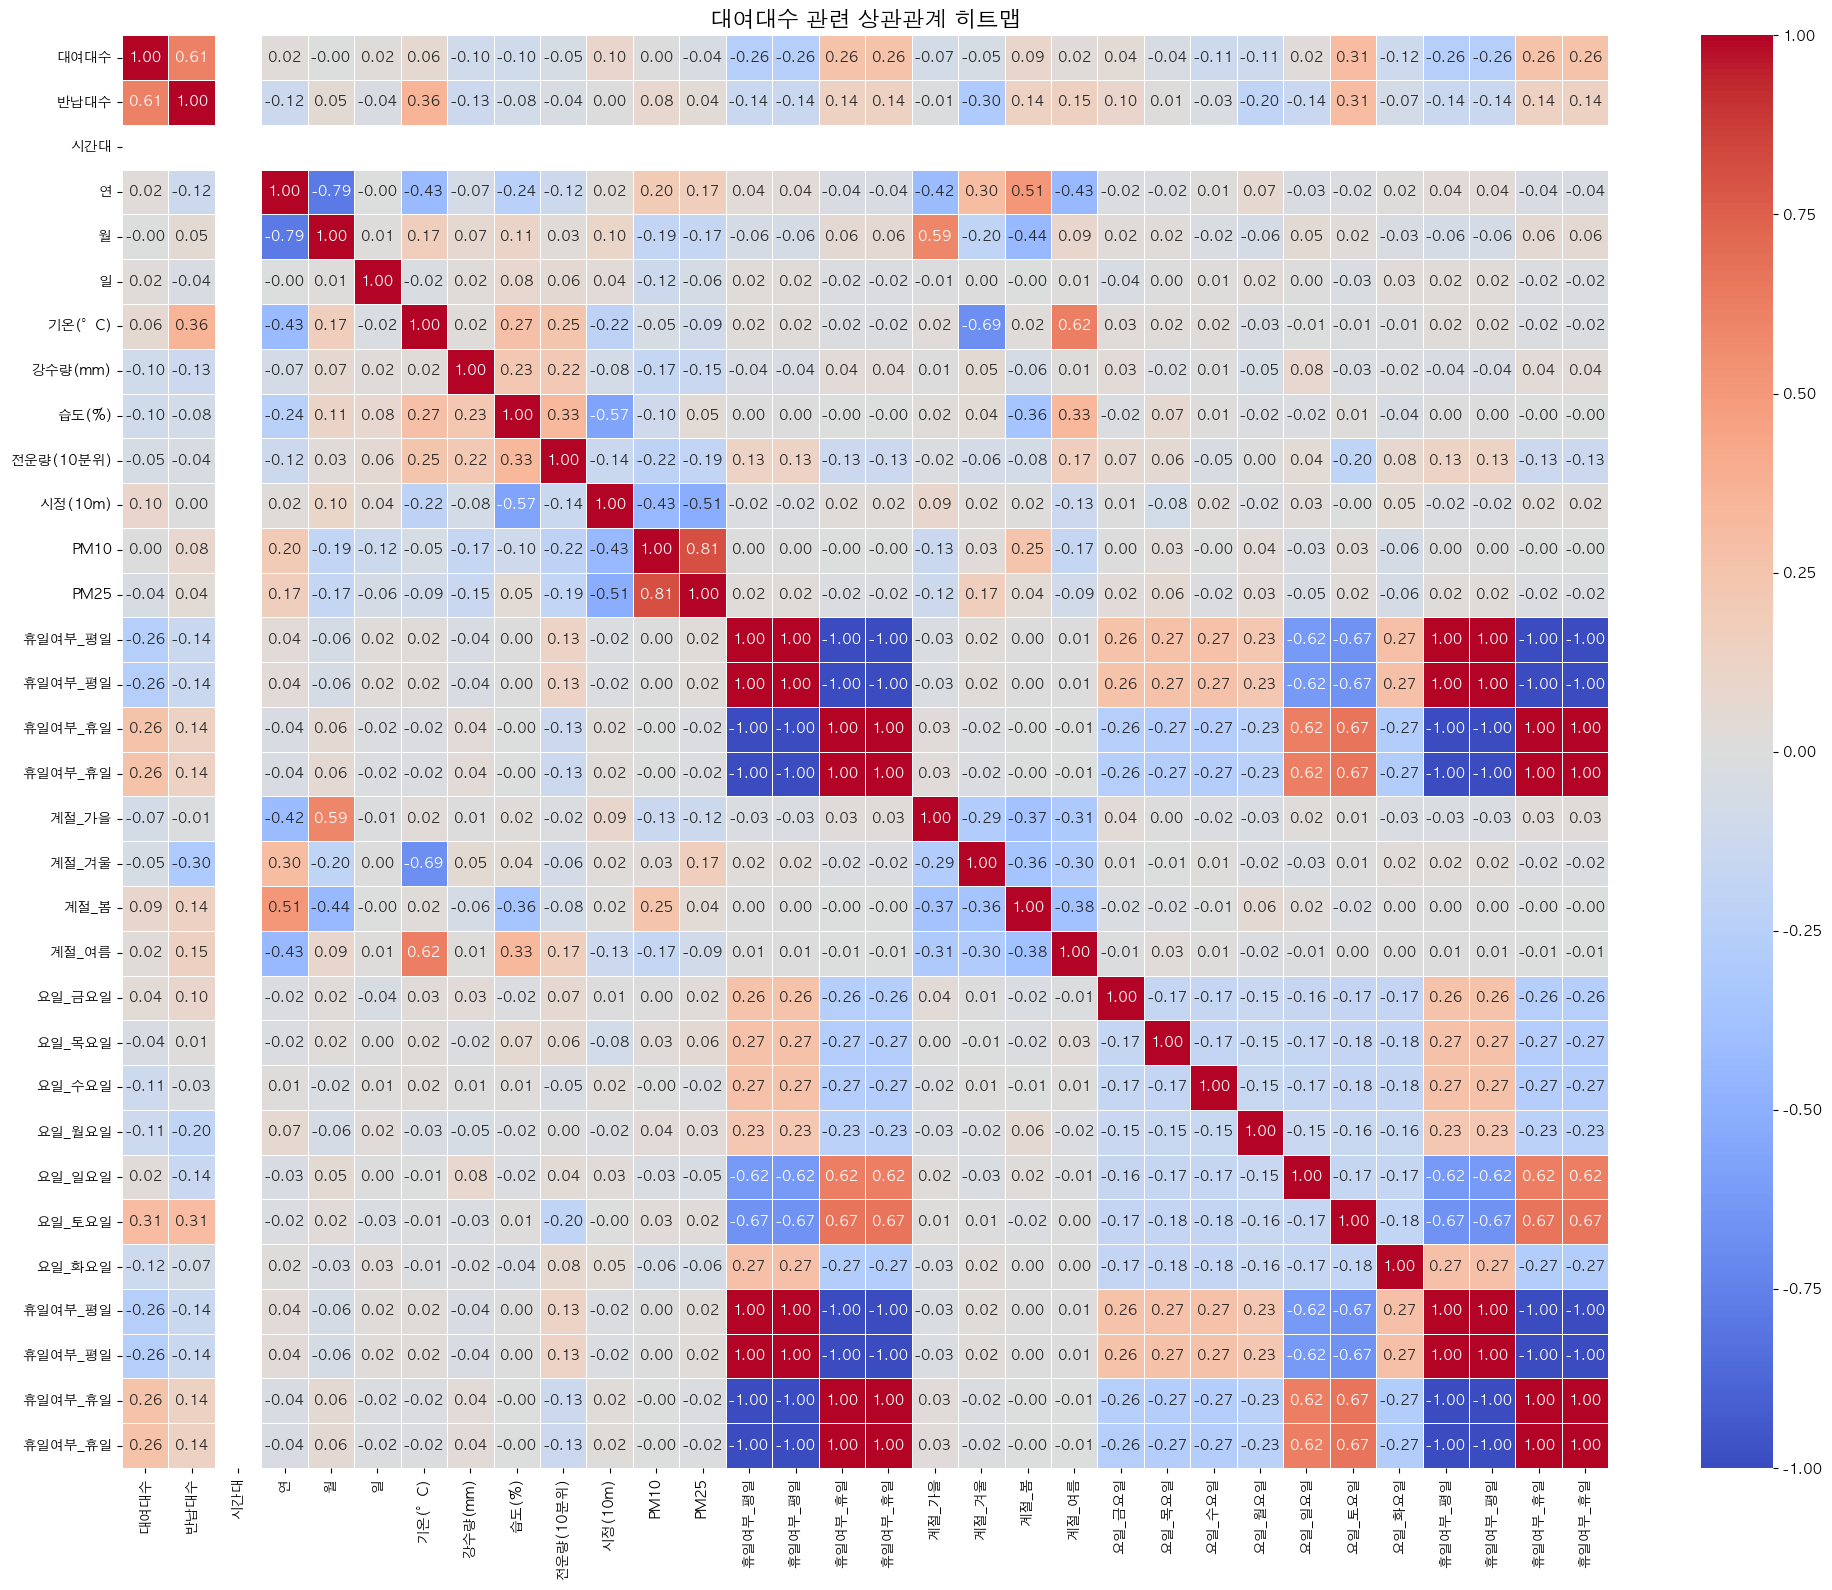

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수들을 더미 변수로 변환
categorical_columns = ['휴일여부', '계절', '요일', '휴일여부']
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# 수치형 변수 선택
numeric_columns = ['대여대수', '반납대수', '시간대', '연', '월', '일', '기온(°C)', '강수량(mm)', '습도(%)', 
                   '전운량(10분위)', '시정(10m)', 'PM10', 'PM25']

# 더미 변수 선택
dummy_columns = [col for col in merged_df_encoded.columns if any(cat in col for cat in categorical_columns)]

# 상관관계를 계산할 열 선택
correlation_data = merged_df_encoded[numeric_columns + dummy_columns]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('대여대수 관련 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()

> 출퇴근용이 너무 앞도적이라 날씨와는 전혀 없어 보인다...

In [34]:
# from statsmodels.tsa.stattools import ccf

# # 기온과 대여 수의 교차 상관 함수
# temp_rentals_ccf = ccf(merged_df['기온(°C)'], merged_df['대여대수'])

# plt.figure(figsize=(12, 6))
# plt.plot(range(len(temp_rentals_ccf)), temp_rentals_ccf)
# plt.title('기온과 대여 수의 교차 상관 함수')
# plt.xlabel('Lag')
# plt.ylabel('Correlation')
# plt.show()

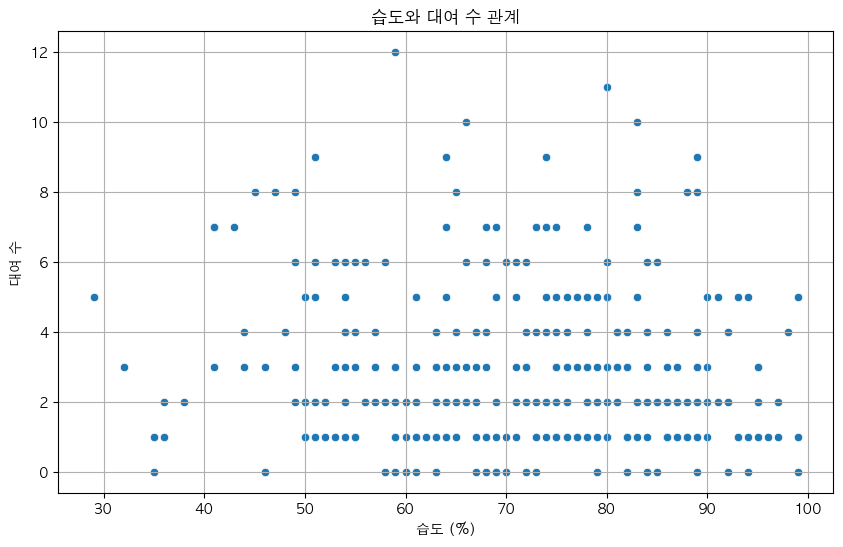

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='습도(%)', y='대여대수', data=merged_df)
plt.title('습도와 대여 수 관계')
plt.xlabel('습도 (%)')
plt.ylabel('대여 수')
plt.grid()
plt.show()

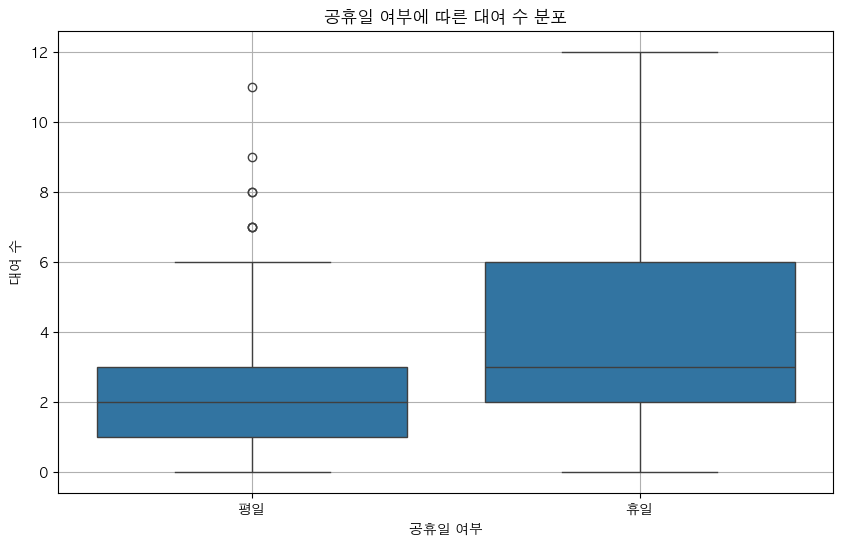

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='휴일여부', y='대여대수', data=merged_df)
plt.title('공휴일 여부에 따른 대여 수 분포')
plt.xlabel('공휴일 여부')
plt.ylabel('대여 수')
plt.grid()
plt.show()

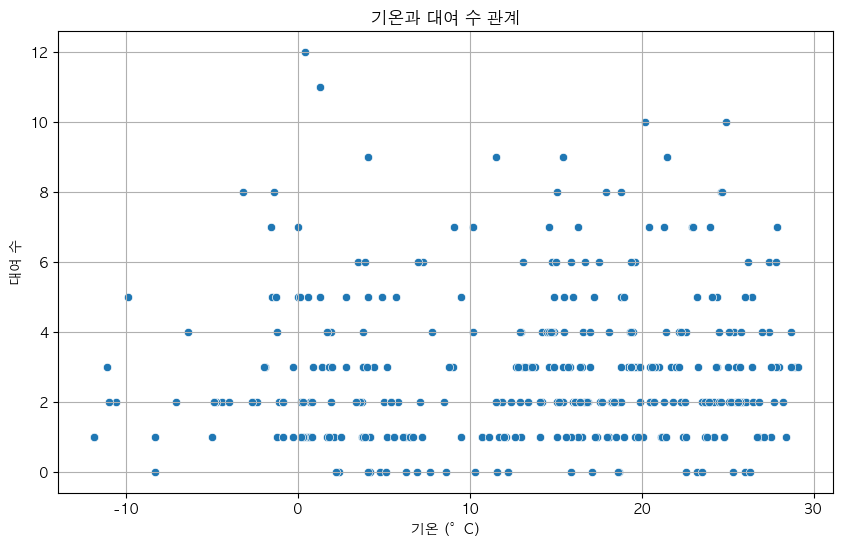

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='기온(°C)', y='대여대수', data=merged_df)
plt.title('기온과 대여 수 관계')
plt.xlabel('기온 (°C)')
plt.ylabel('대여 수')
plt.grid()
plt.show()

> 기온과는 별 관계가 없어 보인다..

### 실시간 api

In [38]:
import requests
import json

# API 엔드포인트 URL
url = "http://openapi.seoul.go.kr:8088/4d4578666b64696e3738416348554e/json/bikeList/1/1000"

# API 요청
response = requests.get(url)

# JSON 형식으로 데이터 파싱
data = json.loads(response.text)

# 롯데타워 잠실역 2번출구 따릉이 스테이션 정보 찾기
target_station = None
for station in data['rentBikeStatus']['row']:
    if "롯데월드타워(잠실역2번출구 쪽)" in station['stationName']:
        target_station = station
        break

# 결과 출력
if target_station:
    print(f"스테이션 이름: {target_station['stationName']}")
    print(f"현재 사용 가능한 자전거 수: {target_station['parkingBikeTotCnt']}")
    print(f"거치대 개수: {target_station['rackTotCnt']}")
    print(f"거치율: {target_station['shared']}%")
else:
    print("롯데타워 잠실역 2번출구 따릉이 스테이션을 찾을 수 없습니다.")

스테이션 이름: 1210. 롯데월드타워(잠실역2번출구 쪽)
현재 사용 가능한 자전거 수: 1
거치대 개수: 30
거치율: 3%


In [39]:
df.to_csv("../data/따릉이전처리.csv", index=False)

In [40]:
df = pd.read_csv("../data/따릉이전처리.csv")
df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일,봄,월요일
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일,봄,월요일
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일,봄,월요일
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일,봄,월요일
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일,봄,월요일


### RandomForestRegressor

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 전처리
df['휴일여부'] = df['휴일여부'].map({'휴일': 1, '평일': 0})
df['날짜'] = pd.to_datetime(df['날짜'])

# 특성 엔지니어링
def categorize_time(hour):
    if 5 <= hour < 12:
        return '아침'
    elif 12 <= hour < 17:
        return '점심'
    elif 17 <= hour < 21:
        return '저녁'
    else:
        return '밤'

df['시간대_세분화'] = df['시간대'].apply(categorize_time)
df['주말_평일'] = df['요일'].apply(lambda x: '주말' if x in ['토', '일'] else '평일')

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['계절', '시간대_세분화', '주말_평일', '요일'])

# 특성 선택
features = df.drop(columns=['대여대수', '대여소', '날짜'])

# 타겟 변수
X = features
y = df['대여대수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 6.728874441760917
R-squared: 0.8744642634017027


---
# 2호선 승하차 데이터 추가

In [42]:
subway = pd.read_csv("../data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding='cp949')
subway.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


In [43]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69931 entries, 0 to 69930
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           69931 non-null  int64 
 1   호선명           69931 non-null  object
 2   지하철역          69931 non-null  object
 3   04시-05시 승차인원  69931 non-null  int64 
 4   04시-05시 하차인원  69931 non-null  int64 
 5   05시-06시 승차인원  69931 non-null  int64 
 6   05시-06시 하차인원  69931 non-null  int64 
 7   06시-07시 승차인원  69931 non-null  int64 
 8   06시-07시 하차인원  69931 non-null  int64 
 9   07시-08시 승차인원  69931 non-null  int64 
 10  07시-08시 하차인원  69931 non-null  int64 
 11  08시-09시 승차인원  69931 non-null  int64 
 12  08시-09시 하차인원  69931 non-null  int64 
 13  09시-10시 승차인원  69931 non-null  int64 
 14  09시-10시 하차인원  69931 non-null  int64 
 15  10시-11시 승차인원  69931 non-null  int64 
 16  10시-11시 하차인원  69931 non-null  int64 
 17  11시-12시 승차인원  69931 non-null  int64 
 18  11시-12시 하차인원  69931 non-null  int64 
 19  12시-

In [44]:
# 잠실역 데이터만 필터링 (2호선)
subway_jamsil = subway[(subway['호선명'] == '2호선') & 
                      (subway['지하철역'] == '잠실(송파구청)')]


In [45]:
# 시간대별 승하차 인원 컬럼 확인
time_columns = [col for col in subway.columns if '시-' in col]

In [46]:
# 데이터 재구성
subway_melted = pd.melt(
    subway_jamsil,
    id_vars=['사용월'],
    value_vars=time_columns,
    var_name='시간대',
    value_name='승하차인원'
)

In [47]:
# 시간대 추출 (예: '04시-05시 승차인원' -> 4)
subway_melted['시간'] = subway_melted['시간대'].str.extract('(\d+)').astype(int)

In [48]:
# 날짜 형식 변환
subway_melted['사용월'] = pd.to_datetime(subway_melted['사용월'].astype(str), format='%Y%m')

In [49]:
subway_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용월     4656 non-null   datetime64[ns]
 1   시간대     4656 non-null   object        
 2   승하차인원   4656 non-null   int64         
 3   시간      4656 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 145.6+ KB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   대여소         8377 non-null   object        
 1   날짜          8377 non-null   datetime64[ns]
 2   시간대         8377 non-null   int64         
 3   대여대수        8377 non-null   float64       
 4   반납대수        8377 non-null   float64       
 5   연           8377 non-null   int64         
 6   월           8377 non-null   int64         
 7   일           8377 non-null   int64         
 8   휴일여부        8377 non-null   int64         
 9   계절_가을       8377 non-null   bool          
 10  계절_겨울       8377 non-null   bool          
 11  계절_봄        8377 non-null   bool          
 12  계절_여름       8377 non-null   bool          
 13  시간대_세분화_밤   8377 non-null   bool          
 14  시간대_세분화_아침  8377 non-null   bool          
 15  시간대_세분화_저녁  8377 non-null   bool          
 16  시간대_세분화_점심  8377 non-nul

In [51]:
df['사용월'] = pd.to_datetime(df['날짜']).dt.to_period('M').dt.to_timestamp()

In [52]:
start_date = pd.to_datetime('2023-05-01')
subway_melted_filtered = subway_melted[subway_melted['사용월'] >= start_date]

In [53]:
subway_melted_filtered['시간대'] = subway_melted_filtered['시간'].astype(int)

In [54]:
combined_df = pd.merge(df, subway_melted_filtered, on=['사용월', '시간대'], how='left')

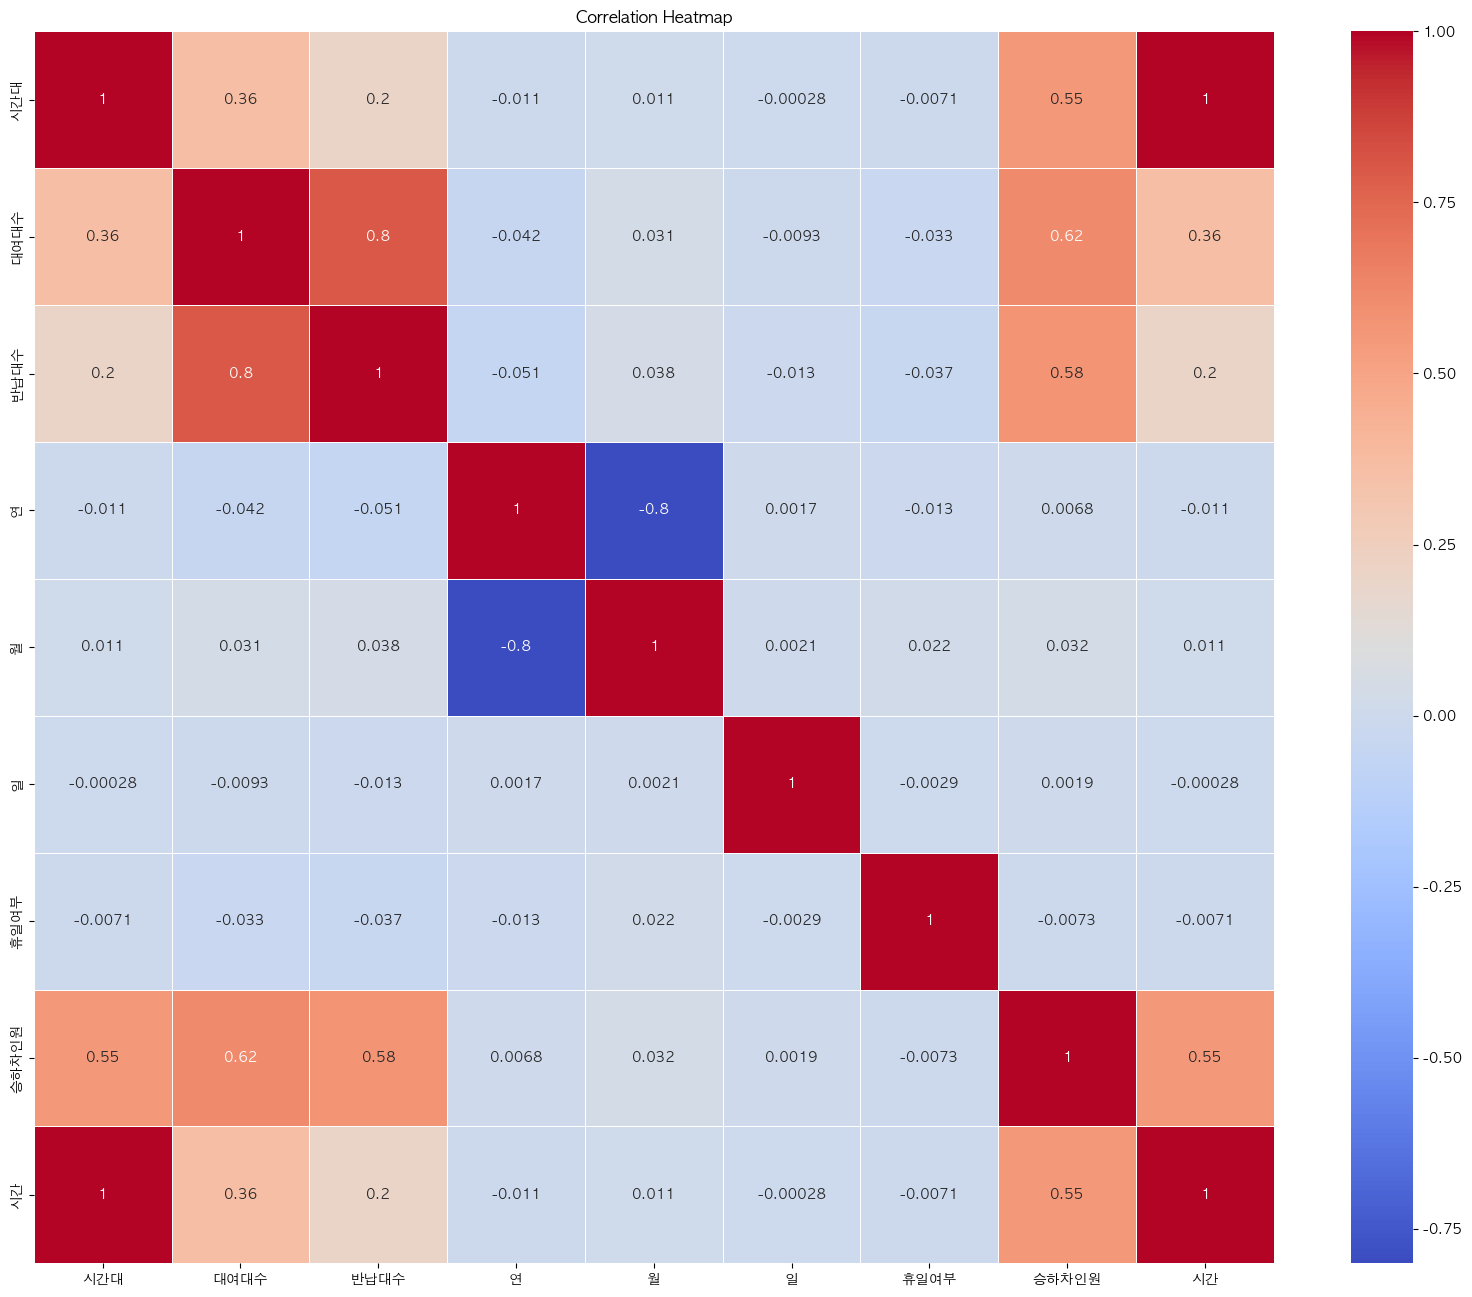

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_columns = combined_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = combined_df[numeric_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# '대여대수'와의 상관관계가 높은 특성 선택
threshold = 0.1  # 상관계수 임계값 설정
selected_features = correlation_matrix['대여대수'][abs(correlation_matrix['대여대수']) > threshold].index.tolist()
selected_features.remove('대여대수')  # 타겟 변수 제거

In [56]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754 entries, 0 to 16753
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   대여소         16754 non-null  object        
 1   날짜          16754 non-null  datetime64[ns]
 2   시간대         16754 non-null  int64         
 3   대여대수        16754 non-null  float64       
 4   반납대수        16754 non-null  float64       
 5   연           16754 non-null  int64         
 6   월           16754 non-null  int64         
 7   일           16754 non-null  int64         
 8   휴일여부        16754 non-null  int64         
 9   계절_가을       16754 non-null  bool          
 10  계절_겨울       16754 non-null  bool          
 11  계절_봄        16754 non-null  bool          
 12  계절_여름       16754 non-null  bool          
 13  시간대_세분화_밤   16754 non-null  bool          
 14  시간대_세분화_아침  16754 non-null  bool          
 15  시간대_세분화_저녁  16754 non-null  bool          
 16  시간대_세분화_점심  16754 non-

In [57]:
combined_df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절_가을,...,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사용월,승하차인원,시간
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,4757,0
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,11181,0
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,8,1
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,348,1
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,103,4


In [58]:
combined_df.to_csv("../data/따릉이전처리.csv", index=False)

In [59]:
df = pd.read_csv("../data/따릉이전처리.csv")
df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절_가을,...,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사용월,승하차인원,시간
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,4757,0
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,11181,0
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,8,1
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,348,1
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,0,False,...,False,False,False,True,False,False,False,2023-05-01,103,4


In [60]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 숫자형 열만 선택 (int64와 float64)
X = df.select_dtypes(include=['int64', 'float64'])

# 상수 열과 분산이 0인 열 제거
X = X.loc[:, (X != X.iloc[0]).any() & (X.var() != 0)]

# 상수항 추가
X = add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값이 무한대인 경우 제거
vif = vif[~np.isinf(vif["VIF"])]

# VIF 값 기준으로 정렬
vif = vif.sort_values("VIF", ascending=False)

print(vif)

  Variable           VIF
0    const  4.867947e+07
2     대여대수  3.237264e+00
3     반납대수  3.111676e+00
4        연  2.815805e+00
5        월  2.805370e+00
8    승하차인원  2.227095e+00
7     휴일여부  1.002501e+00
6        일  1.000369e+00


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 선택된 특성과 타겟 변수 준비
X = df[selected_features]
y = df['대여대수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 훈련 세트에 대한 예측 및 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트 세트에 대한 예측 및 평가
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("훈련 세트 RMSE:", train_rmse)
print("훈련 세트 R-squared:", train_r2)
print("테스트 세트 RMSE:", test_rmse)
print("테스트 세트 R-squared:", test_r2)

# 선택된 특성 출력
print("\n선택된 특성:")
for feature in selected_features:
    print(feature)

훈련 세트 RMSE: 3.4835520740018593
훈련 세트 R-squared: 0.9650689453883396
테스트 세트 RMSE: 6.474047672522101
테스트 세트 R-squared: 0.8708898788898628

선택된 특성:
시간대
반납대수
승하차인원
시간


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

selected_features = ['승하차인원', '일', '시간', '반납대수', '월', '대여대수']
X = combined_df[selected_features].drop('대여대수', axis=1)
y = combined_df['대여대수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 성능 평가
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"훈련 세트 R-squared: {train_score:.4f}")
print(f"테스트 세트 R-squared: {test_score:.4f}")

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"교차 검증 점수: {cv_scores}")
print(f"평균 교차 검증 점수: {np.mean(cv_scores):.4f}")

# 예측 및 RMSE 계산
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# 예측률 (정확도) 계산
accuracy = 1 - (rmse / np.mean(y_test))
print(f"예측률 (정확도): {accuracy:.4f}")

훈련 세트 R-squared: 0.9898
테스트 세트 R-squared: 0.9283
교차 검증 점수: [0.86437412 0.83610214 0.81686994 0.58638295 0.84708746]
평균 교차 검증 점수: 0.7902
RMSE: 4.8233
예측률 (정확도): 0.6736


In [63]:
import pandas as pd

# 사용할 컬럼들만 선택
selected_columns = ['대여소', '대여대수', '반납대수', '월', '일', '시간', '휴일여부', '승하차인원']
cleaned_df = df[selected_columns]

# CSV 파일로 저장
cleaned_df.to_csv('../data/따릉이전처리.csv', index=False)


In [64]:
df = pd.read_csv("../data/따릉이전처리.csv")
df.head()

,대여소,대여대수,반납대수,월,일,시간,휴일여부,승하차인원
0,롯데월드타워(잠실역2번출구 쪽),1.0,1.0,5,1,0,0,4757
1,롯데월드타워(잠실역2번출구 쪽),1.0,1.0,5,1,0,0,11181
2,롯데월드타워(잠실역2번출구 쪽),1.0,0.0,5,1,1,0,8
3,롯데월드타워(잠실역2번출구 쪽),1.0,0.0,5,1,1,0,348
4,롯데월드타워(잠실역2번출구 쪽),1.0,0.0,5,1,4,0,103


In [65]:
import requests
import json

# API 엔드포인트 URL
url = "http://openapi.seoul.go.kr:8088/4d4578666b64696e3738416348554e/json/bikeList/1/1000"

# API 요청
response = requests.get(url)

# JSON 형식으로 데이터 파싱
data = json.loads(response.text)

# 롯데타워 잠실역 2번출구 따릉이 스테이션 정보 찾기
target_station = None
for station in data['rentBikeStatus']['row']:
    if "롯데월드타워(잠실역2번출구 쪽)" in station['stationName']:
        target_station = station
        break

# 결과 출력
if target_station:
    print(f"스테이션 이름: {target_station['stationName']}")
    print(f"현재 사용 가능한 자전거 수: {target_station['parkingBikeTotCnt']}")
    print(f"거치대 개수: {target_station['rackTotCnt']}")
    print(f"거치율: {target_station['shared']}%")
else:
    print("롯데타워 잠실역 2번출구 따릉이 스테이션을 찾을 수 없습니다.")

스테이션 이름: 1210. 롯데월드타워(잠실역2번출구 쪽)
현재 사용 가능한 자전거 수: 1
거치대 개수: 30
거치율: 3%


In [78]:
df.drop(columns='대여소', inplace=True)
df.head()

,대여대수,반납대수,월,일,시간,휴일여부,승하차인원
0,1.0,1.0,5,1,0,0,4757
1,1.0,1.0,5,1,0,0,11181
2,1.0,0.0,5,1,1,0,8
3,1.0,0.0,5,1,1,0,348
4,1.0,0.0,5,1,4,0,103


> 정규화

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

# 데이터 준비
X = df[['월', '일', '시간', '휴일여부', '승하차인원']]
y_rental = df['대여대수']
y_return = df['반납대수']

In [80]:
# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_rental_scaled = scaler.fit_transform(y_rental.values.reshape(-1, 1))
y_return_scaled = scaler.fit_transform(y_return.values.reshape(-1, 1))

# 데이터 분할
X_train, X_test, y_rental_train, y_rental_test, y_return_train, y_return_test = train_test_split(
    X_scaled, y_rental_scaled, y_return_scaled, test_size=0.2, random_state=42)


In [81]:
# 모델 정의
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# 하이퍼파라미터 그리드
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "XGBoost": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0]
    }
}

In [82]:
def train_and_evaluate(X_train, X_test, y_train, y_test, task):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    for model_name, model in models.items():
        print(f"Training {model_name} for {task}...")
        grid_search = GridSearchCV(model, param_grids[model_name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train.ravel())
        
        best_model = grid_search.best_estimator_
        y_train_pred = best_model.predict(X_train).reshape(-1, 1)
        y_test_pred = best_model.predict(X_test).reshape(-1, 1)
        
        y_train_pred = scaler.inverse_transform(y_train_pred)
        y_test_pred = scaler.inverse_transform(y_test_pred)
        y_train_original = scaler.inverse_transform(y_train)
        y_test_original = scaler.inverse_transform(y_test)
        
        train_mse = mean_squared_error(y_train_original, y_train_pred)
        test_mse = mean_squared_error(y_test_original, y_test_pred)
        train_r2 = r2_score(y_train_original, y_train_pred)
        test_r2 = r2_score(y_test_original, y_test_pred)
        
        results[model_name] = {
            'Best Params': grid_search.best_params_,
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train R2': train_r2,
            'Test R2': test_r2
        }
        
        print(f"{model_name} Results:")
        print(f"Best Params: {grid_search.best_params_}")
        print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
        print("=" * 50)
    
    return results

In [83]:
# 대여 모델 학습 및 평가
rental_results = train_and_evaluate(X_train, X_test, y_rental_train, y_rental_test, "Rental")

# 반납 모델 학습 및 평가
return_results = train_and_evaluate(X_train, X_test, y_return_train, y_return_test, "Return")

Training Random Forest for Rental...
Random Forest Results:
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 4.0966, Test MSE: 25.2793
Train R2: 0.9722, Test R2: 0.8163
Training XGBoost for Rental...
XGBoost Results:
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Train MSE: 30.5276, Test MSE: 32.5827
Train R2: 0.7927, Test R2: 0.7632
Training GradientBoosting for Rental...
GradientBoosting Results:
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Train MSE: 30.3757, Test MSE: 32.6686
Train R2: 0.7937, Test R2: 0.7626
Training Random Forest for Return...
Random Forest Results:
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 7.1052, Test MSE: 46.6305
Train R2: 0.9692, Test R2: 0.7916
Training XGBoost for Return...
XGBoost Results:
Best Params: {'colsampl

In [84]:
# 결과 출력
print("\nRental Model Results:")
print(pd.DataFrame(rental_results).T)
print("\nReturn Model Results:")
print(pd.DataFrame(return_results).T)

# 최적의 모델 선택
best_rental_model = max(rental_results, key=lambda x: rental_results[x]['Test R2'])
best_return_model = max(return_results, key=lambda x: return_results[x]['Test R2'])

print(f"\nBest Rental Model: {best_rental_model}")
print(f"Best Rental Model Parameters: {rental_results[best_rental_model]['Best Params']}")
print(f"Rental Model Test R2 Score: {rental_results[best_rental_model]['Test R2']:.4f}")

print(f"\nBest Return Model: {best_return_model}")
print(f"Best Return Model Parameters: {return_results[best_return_model]['Best Params']}")
print(f"Return Model Test R2 Score: {return_results[best_return_model]['Test R2']:.4f}")


Rental Model Results:
                                                        Best Params  \
Random Forest     {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
XGBoost           {'colsample_bytree': 1.0, 'learning_rate': 0.1...   
GradientBoosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   

                  Train MSE   Test MSE  Train R2   Test R2  
Random Forest      4.096648   25.27933  0.972176   0.81626  
XGBoost           30.527638  32.582668  0.792657  0.763177  
GradientBoosting  30.375736  32.668586  0.793689  0.762552  

Return Model Results:
                                                        Best Params  \
Random Forest     {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
XGBoost           {'colsample_bytree': 1.0, 'learning_rate': 0.1...   
GradientBoosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   

                  Train MSE   Test MSE  Train R2   Test R2  
Random Forest      7.105246  46.630475  0.969185   0.79158  
XGBoost           

In [85]:
from joblib import dump

# 대여 모델 저장
dump({"scaler": scaler, "model": rental_results[best_rental_model]['Best Params']}, "../data/lotte_rental_model.h5")

# 반납 모델 저장
dump({"scaler": scaler, "model": return_results[best_return_model]['Best Params']}, "../data/lotte_return_model.h5")

['../data/lotte_return_model.h5']

In [86]:
from joblib import load

# 대여 모델 불러오기
rental_data = load("../data/lotte_rental_model.h5")
rental_scaler = rental_data["scaler"]
rental_model = rental_data["model"]

# 반납 모델 불러오기
return_data = load("../data/lotte_return_model.h5")
return_scaler = return_data["scaler"]
return_model = return_data["model"]

In [ ]:
# import pandas as pd
# import datetime
# import pytz

# # 현재 시간 정보 가져오기
# korean_timezone = pytz.timezone('Asia/Seoul')
# current_time = datetime.datetime.now(korean_timezone)
# one_hour_later = current_time + datetime.timedelta(hours=1)

# # 예측에 필요한 특성 준비 (대여소는 제외)
# features = {
#     '월': [one_hour_later.month],
#     '일': [one_hour_later.day],
#     '시간': [one_hour_later.hour],
#     '휴일여부': [1 if one_hour_later.weekday() >= 5 else 0],
#     '승하차인원': [1000]  # 실제 승하차 인원 데이터를 여기에 넣어야 합니다.
# }

# features_df = pd.DataFrame(features)

# # 정규화된 특성으로 변환 (문자열 열 제외)
# features_scaled = return_scaler.transform(features_df)

# # 한 시간 후 반납 예측
# predicted_return = return_model.predict(features_scaled)[0]

# print(f"한 시간 후 예상 반납 수: {predicted_return:.2f}")